### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [141]:
data.head()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [38]:
# Look for null values in each column
display((data.isnull().sum()))

print("percentage of null records")
display(round(100*(data.isnull().sum()/len(data)),2))
display(data['Bar'].value_counts())
print("looks like the column car has a lot of null values so better to drop that column since only 1 about 1% of data is not null")



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

percentage of null records


destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
dtype: float64

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

looks like the column car has a lot of null values so better to drop that column since only 1 about 1% of data is not null


3. Decide what to do about your missing data -- drop, replace, other...

In [41]:
# planning to drop the entire column 'car' itself, sicne 99% of that column's data is null.
#  Not dropping row's where car value is null but dropping the entire column itself.
# for other columns, the null record percentage is in the 1% range so decided to drop those records with null values

data_cleaned = data.drop(columns={'car'})
data_cleaned.dropna(inplace=True)

print("Percentage of initial record remaining after cleaning = {}".format(round(100*len(data_cleaned)/len(data),2)))

display((data_cleaned.isnull().sum()))

# confirmed not more null records




Percentage of initial record remaining after cleaning = 95.23


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [71]:
# Here I am using the cleaned data set as explained above to answer all questions below

print('% of total population that choose the accept the coupon = {}%'.format(round(100*len(data_cleaned[data_cleaned['Y']==1])/(len(data_cleaned)),2)))

% of total population that choose the accept the coupon = 56.93%


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:title={'center':'Histogram of differnt types of coupons in the dataset'}>

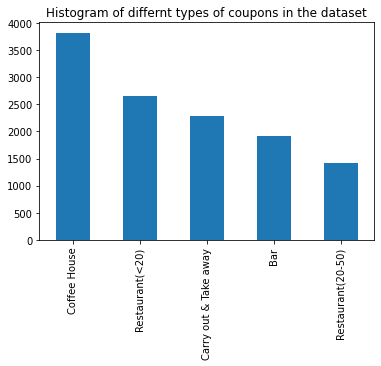

In [72]:
data_cleaned['coupon'].value_counts().plot.bar(title='Histogram of differnt types of coupons in the dataset')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:title={'center':'Histogram of differnt types of temparature values in the dataset'}, ylabel='Frequency'>

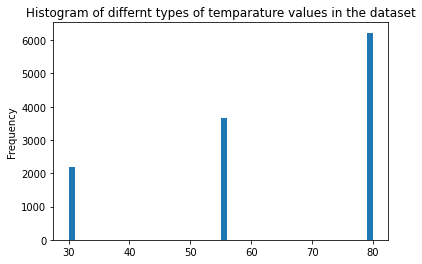

In [73]:
data_cleaned['temperature'].plot.hist(title='Histogram of differnt types of temparature values in the dataset',bins=50)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [74]:
data_bar_coupons=data_cleaned[data_cleaned['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [75]:
print("Portion of bar coupons that were accepeted = {}%".format(round(100*(len(data_bar_coupons[data_bar_coupons['Y']==1])/len(data_bar_coupons)),2)))


Portion of bar coupons that were accepeted = 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [88]:
_3_or_less_bar_visit_list = ['never', 'less1', '1~3']
_more_than_3_bar_visit_list = ['4~8','gt8']

df_3_or_less_bar_visits = data_bar_coupons[data_bar_coupons['Bar'].isin(_3_or_less_bar_visit_list)]
df_more_than_3_bar_visits = data_bar_coupons[data_bar_coupons['Bar'].isin(_more_than_3_bar_visit_list)]

print("Bar Coupon acceptance rate for poeple who went to a bar 3 or fewer times = {}%".format(round(100*len(df_3_or_less_bar_visits[df_3_or_less_bar_visits['Y']==1])/len(df_3_or_less_bar_visits),2)))

print("Bar Coupon acceptance rate for poeple who went to a bar more than 3 time a month = {}%".format(round(100*len(df_more_than_3_bar_visits[df_more_than_3_bar_visits['Y']==1])/len(df_more_than_3_bar_visits),2)))


Bar Coupon acceptance rate for poeple who went to a bar 3 or fewer times = 37.27%
Bar Coupon acceptance rate for poeple who went to a bar more than 3 time a month = 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [95]:
data_bar_coupons['age'].unique()
df_drivers_go_to_bar_more_than_once_and_age_25 = data_bar_coupons[ (data_bar_coupons['Bar'].isin([ '1~3','4~8','gt8'] )) & (data_bar_coupons['age'].isin(['46', '26', '31', '41', '50plus', '36'])) ]
df_all_others= data_bar_coupons[ ~(data_bar_coupons['Bar'].isin(['less1', '1~3','4~8','gt8'] )) & (data_bar_coupons['age'].isin(['46', '26', '31', '41', '50plus', '36'])) ]

print("Acceptance rate of drivers who are above 25 and goes to a bar more than once a month is {}%".format(round(100*len(df_drivers_go_to_bar_more_than_once_and_age_25[df_drivers_go_to_bar_more_than_once_and_age_25['Y']==1])/len(df_drivers_go_to_bar_more_than_once_and_age_25),2)))


print("Acceptance rate of all others is {}%".format(round(100*len(df_all_others[df_all_others['Y']==1])/len(df_all_others),2)))

Acceptance rate of drivers who are above 25 and goes to a bar more than once a month is 68.98%
Acceptance rate of all others is 16.13%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [107]:

data_bar_coupons['occupation'].unique()
filter = data_bar_coupons['Bar'].isin([ '1~3','4~8','gt8']) & (data_bar_coupons['passanger']!= 'Kid(s)') & (data_bar_coupons['occupation']!='Farming Fishing & Forestry')

df_filtered_q5 = data_bar_coupons[filter]

print("Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is {}%"
            .format(round(100*len(df_filtered_q5[df_filtered_q5['Y']==1])/len(df_filtered_q5)),2))

df_filtered_q5_others = data_bar_coupons[~filter]

print("Acceptance rate of others {}%"
            .format(round(100*len(df_filtered_q5_others[df_filtered_q5_others['Y']==1])/len(df_filtered_q5_others)),2))




Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71%
Acceptance rate of others 30%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [119]:
# Assuming the OR statement above is to link it all togetehr and its just a one single filter

filter_q6_f1 = (data_bar_coupons['Bar'].isin([ '1~3','4~8','gt8'])) & (data_bar_coupons['passanger']!= 'Kid(s)') & (data_bar_coupons['maritalStatus']!='Widowed')
filter_q6_f2 = (data_bar_coupons['Bar'].isin([ '1~3','4~8','gt8'])) & (data_bar_coupons['age'].isin(['21','26','below21']))
filter_q6_f3 = (data_bar_coupons['RestaurantLessThan20'].isin(['4~8','gt8'])) & (data_bar_coupons['income'].isin(['$12500 - $24999','Less than $12500','$25000 - $37499','$37500 - $49999']))

df_q6 = data_bar_coupons[(filter_q6_f1) | (filter_q6_f2) | (filter_q6_f3)]

print("Acceptance rate = {}%".format(round(100*len(df_q6[df_q6['Y']==1])/(len(df_q6)),2)))

Acceptance rate = 58.71%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#  I think drivers who goes to bar frequently has more chances of accepting a bar coupon if they don't have kids.
#  The age of the driver also affects the acceptance rate, usually drivers above the age of 25 seems to accept the coupons often than the rest.
#  also people who are not in the farmoing fishing or forestry seems to stay away from accepting the coupon - 
# this was surprising to me since it was against my intuition. I think it's may be becasue they have a lower income or
#  have a proper local bar they prefer to go to :) 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [122]:
# Looking at coffee coupons

data_coffee_coupon = data_cleaned[data_cleaned['coupon']=='Coffee House']


`Looking at the relation of acceptance to coffee coupons and weather for groups that goes to a coffee shop more than once`

In [136]:
data_coffee_coupon['CoffeeHouse'].value_counts()
def percent(x):
    return(round(100*(sum(x)/len(x)),2))

data_grouped_coffehouse_visits = data_coffee_coupon.groupby(['CoffeeHouse']).agg({'Y':percent}).reset_index()
data_grouped_coffehouse_visits.columns=['CoffeHouse Visits','Acceptance rate of a coffee coupon in %']
display(data_grouped_coffehouse_visits.sort_values(by = 'Acceptance rate of a coffee coupon in %'))

,CoffeHouse Visits,Acceptance rate of a coffee coupon in %
4,never,17.52
3,less1,48.10
0,1~3,64.77
2,gt8,65.79
1,4~8,68.24


``Looks like the pfreq of coffee visits have a positive impact on the acceptance rate of a coffee coupon with anything above 1 visit per month showing a good causation. Now, let me look at other factors that boosts the acceptance rate``

In [147]:
data_grouped_gender = data_coffee_coupon.groupby(['gender']).agg({'Y':percent}).reset_index()
display(data_grouped_gender)
print("Looks like Gender is not a differentiating factor at all , was against my intuition")


data_grouped_passenger = data_coffee_coupon.groupby(['passanger']).agg({'Y':percent}).reset_index()
display(data_grouped_passenger)

print(" Looks like having another person in the car might slightly increase the chance of accepting a coffee coupon" )


data_grouped_passenger = data_coffee_coupon.groupby(['temperature']).agg({'Y':percent}).reset_index()
display(data_grouped_passenger)

#print(" Looks like having another person in the car might slightly increase the chance of accepting a coffee coupon" )

data_grouped_passenger = data_coffee_coupon.groupby(['weather']).agg({'Y':percent}).reset_index()
display(data_grouped_passenger)

#print(" Looks like having another person in the car might slightly increase the chance of accepting a coffee coupon" )

data_grouped_passenger = data_coffee_coupon.groupby(['time']).agg({'Y':percent}).reset_index()
display(data_grouped_passenger)

print(" Looks like early morning and right after lunch times have a slight correaltion to selecting cofee coupons" )

data_grouped_passenger = data_coffee_coupon.groupby(['occupation']).agg({'Y':percent}).reset_index()
display(data_grouped_passenger)

print("Looks like Building & Grounds Cleaning & Maintenance and Healthcare Practitioners & Technical professionals have a more tendency to schoose the coffee coupon")



,gender,Y
0,Female,49.11
1,Male,50.19


Looks like Gender is not a differentiating factor at all , was against my intuition


,passanger,Y
0,Alone,43.39
1,Friend(s),59.74
2,Kid(s),47.15
3,Partner,56.70


 Looks like having another person in the car might slightly increase the chance of accepting a coffee coupon


,temperature,Y
0,30,44.15
1,55,45.20
2,80,52.70


,weather,Y
0,Rainy,51.63
1,Snowy,42.81
2,Sunny,50.09


,time,Y
0,10AM,63.48
1,10PM,42.91
2,2PM,54.55
3,6PM,41.23
4,7AM,44.00


 Looks like early morning and right after lunch times have a slight correaltion to selecting cofee coupons


,occupation,Y
0,Architecture & Engineering,55.56
1,Arts Design Entertainment Sports & Media,50.00
2,Building & Grounds Cleaning & Maintenance,72.73
3,Business & Financial,47.18
4,Community & Social Services,37.88
5,Computer & Mathematical,50.12
6,Construction & Extraction,47.83
7,Education&Training&Library,41.39
8,Farming Fishing & Forestry,54.55
9,Food Preparation & Serving Related,40.26


,income,Y
0,$100000 or More,48.95
1,$12500 - $24999,55.22
2,$25000 - $37499,46.52
3,$37500 - $49999,54.74
4,$50000 - $62499,49.80
5,$62500 - $74999,43.54
6,$75000 - $87499,29.82
7,$87500 - $99999,53.94
8,Less than $12500,54.03


`Now, let me try to see if a combination of these features and values I identified above increases the acceptance rate of the group vs others
1. test group criterias:
    - Occupation in ['Healthcare Practitioners & Technical','Building & Grounds Cleaning & Maintenance']
    - Time in ['10AM','2PM']
    - passenger in ['Friend(s)','Partner']
    - CoffeeHouse not in ['never']
`

In [153]:
occupation_filter = data_coffee_coupon['occupation'].isin(['Healthcare Practitioners & Technical','Building & Grounds Cleaning & Maintenance'])
time_filter = data_coffee_coupon['time'].isin(['10AM','2PM'])
passenger_filter = data_coffee_coupon['passanger'].isin(['Friend(s)','Partner'])
CoffeeHouse = ~data_coffee_coupon['CoffeeHouse'].isin(['never'])

hypothesis_df = data_coffee_coupon[(occupation_filter)&(time_filter)&(passenger_filter)&(CoffeeHouse)]
not_hypothesis_df = data_coffee_coupon[~((occupation_filter)&(time_filter)&(passenger_filter)&(CoffeeHouse))]

print("Acceptance rate of this hypothesis group is {}%".format(round(100*len(hypothesis_df[hypothesis_df['Y']==1])/len(hypothesis_df),2)))

print("Acceptance rate of the other group compared to hypothesis group is {}, which is close to the parent groups acceptnce rate of {}%".format(round(100*len(not_hypothesis_df[not_hypothesis_df['Y']==1])/len(not_hypothesis_df),2), round(100*len(data_coffee_coupon[data_coffee_coupon['Y']==1])/(len(data_coffee_coupon)),2)))





Acceptance rate of this hypothesis group is 96.15%
Acceptance rate of the other group compared to hypothesis group is 49.31, which is close to the parent groups acceptnce rate of 49.63%


`Really Happy that I found a hypothesis group which shows 96% coupon acceptance rate  :) `